---
---
# Random Forests

## a) Imports

In [12]:
import matplotlib.pyplot as plt
#import ipywidgets as widgets
from sklearn.svm import SVC
import sklearn as sk
import seaborn as sns 
import pandas as pd
import numpy as np
import warnings

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

In [13]:
#Training sets
df_HCC = pd.read_csv("raw_data/HCC1806_SmartS_Filtered_Normalised_3000_Data_train.txt", delimiter="\ ",engine='python',index_col=0)
df_MCF = pd.read_csv("raw_data/MCF7_SmartS_Filtered_Normalised_3000_Data_train.txt", delimiter="\ ",engine='python',index_col=0)

#Metadata files
df_meta_HCC = pd.read_csv("raw_data/HCC1806_SmartS_MetaData.tsv",delimiter="\t",engine='python',index_col=0)
df_meta_MCF = pd.read_csv("raw_data/MCF7_SmartS_MetaData.tsv",delimiter="\t",engine='python',index_col=0)

#Transposing
df_HCC = df_HCC.T
df_MCF = df_MCF.T

print(df_HCC.shape)
df_HCC.head()


(182, 3000)


,"""DDIT4""","""ANGPTL4""","""CALML5""","""KRT14""","""CCNB1""","""IGFBP3""","""AKR1C2""","""KRT6A""","""NDRG1""","""KRT4""",...,"""MST1R""","""ZYG11A""","""NRG1""","""RBMS3""","""VCPIP1""","""LINC02693""","""OR8B9P""","""NEAT1""","""ZDHHC23""","""ODAD2"""
"""output.STAR.PCRPlate1G12_Normoxia_S32_Aligned.sortedByCoord.out.bam""",0,48,0,321,298,82,6250,634,0,0,...,78,10,136,0,0,29,0,29,0,0
"""output.STAR.PCRPlate1G1_Hypoxia_S102_Aligned.sortedByCoord.out.bam""",8739,2101,55,96,1824,1938,62,0,522,413,...,279,0,264,0,134,68,0,213,0,0
"""output.STAR.PCRPlate1G2_Hypoxia_S2_Aligned.sortedByCoord.out.bam""",13098,14032,0,0,1616,247,430,907,348,0,...,311,0,38,0,0,0,0,92,0,0
"""output.STAR.PCRPlate1G3_Hypoxia_S7_Aligned.sortedByCoord.out.bam""",2880,356,0,6211,3,3430,79,1953,592,176,...,125,0,16,0,4,1,0,1,0,0
"""output.STAR.PCRPlate1G4_Hypoxia_S107_Aligned.sortedByCoord.out.bam""",7777,5661,4383,0,145,4618,246,85,206,0,...,268,1,25,0,0,0,0,128,0,0


In [14]:
#Items from Train-Test split

#Metadata Files
filepath_HCC = "raw_data/HCC1806_SmartS_MetaData.tsv"
filepath_MCF = "raw_data/MCF7_SmartS_MetaData.tsv"

#already in main:
df_meta_HCC = pd.read_csv(filepath_HCC,delimiter="\t",engine='python',index_col=0)
df_meta_MCF = pd.read_csv(filepath_MCF,delimiter="\t",engine='python',index_col=0)

#Filtered Files
df_HCC_s_f = pd.read_csv("raw_data/HCC1806_SmartS_Filtered_Data.txt", delimiter="\ ",engine='python',index_col=0)
df_MCF_s_f = pd.read_csv("raw_data/MCF7_SmartS_Filtered_Data.txt", delimiter="\ ",engine='python',index_col=0)

#Transposition
df_HCC_F = df_HCC_s_f.T
df_MCF_F = df_MCF_s_f.T
df_HCC_F.head()

,"""CICP27""","""DDX11L17""","""WASH9P""","""OR4F29""","""MTND1P23""","""MTND2P28""","""MTCO1P12""","""MTCO2P12""","""MTATP8P1""","""MTATP6P1""",...,"""MT-TH""","""MT-TS2""","""MT-TL2""","""MT-ND5""","""MT-ND6""","""MT-TE""","""MT-CYB""","""MT-TT""","""MT-TP""","""MAFIP"""
"""output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam""",0,0,0,2,250,54,1740,6,1,974,...,17,5,15,3852,900,22,4208,26,66,0
"""output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam""",0,0,0,0,424,100,2340,5,1,1642,...,49,29,36,7457,1439,43,6491,62,71,4
"""output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam""",0,0,0,0,63,16,1020,3,0,653,...,43,17,8,1479,234,0,4819,11,3,7
"""output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam""",0,0,0,0,27,3,303,0,0,91,...,0,0,3,303,33,0,310,4,9,0
"""output.STAR.PCRPlate1A4_Hypoxia_S8_Aligned.sortedByCoord.out.bam""",0,1,0,0,81,1,587,0,0,161,...,1,0,0,650,79,3,695,0,14,9


In [15]:
#-----SmartSeq-----#
HCC_s_Train = pd.read_csv("processed_data\HCC1806_SmartS_Filtered_Standardized-Normalised_3000_Data_train.txt", delimiter="\ ",engine='python',index_col=0)
MCF_s_Train = pd.read_csv("processed_data\MCF7_SmartS_Filtered_Standardized-Normalised_3000_Data_train.txt", delimiter="\ ",engine='python',index_col=0)
HCC_s_Test = pd.read_csv("processed_data\HCC1806_SmartS_Filtered_Standardized-Normalised_3000_Data_test.txt", delimiter="\ ",engine='python',index_col=0)
MCF_s_Test = pd.read_csv("processed_data\MCF7_SmartS_Filtered_Standardized-Normalised_3000_Data_test.txt", delimiter="\ ",engine='python',index_col=0)

#-----DropSeq-----#
#HCC_d = pd.read_csv("raw_data_DropSeq\HCC1806_Filtered_Normalised_3000_Data_train.txt", delimiter="\ ",engine='python',index_col=0)
#MCF_d = pd.read_csv("raw_data_DropSeq\MCF7_Filtered_Normalised_3000_Data_train.txt", delimiter="\ ",engine='python',index_col=0)




In [16]:
#--- From MLP

df_HCC_tr = pd.read_csv("raw_data/HCC1806_SmartS_Filtered_Normalised_3000_Data_train.txt", delimiter="\ ",engine='python',index_col=0)
df_MCF_tr = pd.read_csv("raw_data/MCF7_SmartS_Filtered_Normalised_3000_Data_train.txt", delimiter="\ ",engine='python',index_col=0)
df_HCC_tr = df_HCC_tr.T
df_MCF_tr = df_MCF_tr.T

---
## b) From Train Test split

In [49]:
def split_train_test(data, test_ratio):
 shuffled_indices = np.random.permutation(len(data))
 test_set_size = int(len(data) * test_ratio)
 test_indices = shuffled_indices[:test_set_size]
 train_indices = shuffled_indices[test_set_size:]
 return data.iloc[train_indices], data.iloc[test_indices]

In [42]:
df_HCC_train , df_HCC_test = split_train_test(df_HCC, 0.2)
df_MCF_train , df_MCF_test = split_train_test(df_MCF, 0.2)

In [38]:
#Given a dataset it returns a list will all the values of the targets (hypo = 0 and Norm = 1)
def labels(df):
    target = []
    for c in df.columns:
        if "Hypoxia" in c.replace('\"', '').split("_") or "Hypo" in c.split("_"):
            target.append(0.0)
        elif "Normoxia" in c.replace('\"', '').split("_") or "Norm" in c.split("_"):
            target.append(1.0)
        else:
            print(c)
            raise ValueError("Cell cannot be categorized")
    return target

In [39]:
Y_HCC_train = labels(df_HCC_train.T)
Y_HCC_test = labels(df_HCC_test.T)
Y_MCF_train = labels(df_MCF_train.T)
Y_MCF_test = labels(df_MCF_test.T)

In [22]:
#From Michele's split
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
df_HCC_train , df_HCC_test = split_train_test(df_HCC, 0.2)
df_MCF_train , df_MCF_test = split_train_test(df_MCF, 0.2)

In [23]:
#From Michele's split
def Label(df, meta):
    Names = [cell[1:-1] for cell in df.index]
    Hypo = [meta.loc[i,"Condition"] for i in Names]
    OH_Hypo = [1 if x=="Normo" else 0 for x in Hypo]
    result = pd.DataFrame(OH_Hypo, columns=["Condition"], index=df.index)
    return result
Y_HCC_train = Label(df_HCC_train, df_meta_HCC)
Y_HCC_test = Label(df_HCC_test, df_meta_HCC)
Y_MCF_train = Label(df_MCF_train, df_meta_MCF)
Y_MCF_test = Label(df_MCF_test, df_meta_MCF)

In [54]:
#mine
from sklearn.model_selection import train_test_split

# Splitting the HCC dataset
df_HCC_train, df_HCC_test, Y_HCC_train, Y_HCC_test = train_test_split(df_HCC, labels(df_HCC.T), test_size=0.2, random_state=42)

# Splitting the MCF dataset
df_MCF_train, df_MCF_test, Y_MCF_train, Y_MCF_test = train_test_split(df_MCF, labels(df_MCF.T), test_size=0.2, random_state=42)


HCC dataset split completed.
MCF dataset split completed.


---
## c) Feature selection (?)

---
## d) Random Forest Function

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class RandomForestModel:
    def _init_(self, n_estimators=100, max_depth=None, random_state=None):
        self.model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)
        
    def train(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        self.model.fit(X_train, y_train)
        
    def evaluate(self, X, y):
        y_pred = self.model.predict(X)
        accuracy = accuracy_score(y, y_pred)
        return accuracy
    
    def predict(self, X):
        return self.model.predict(X)

In [27]:
from sklearn.ensemble import RandomForestClassifier

def build_random_forest(X_train, y_train, n_estimators=100, max_depth=None, random_state=None):
    rf_model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)
    rf_model.fit(X_train, y_train)
    return rf_model


In [35]:
rf_model = build_random_forest(X_train, y_train, n_estimators=100, max_depth=10, random_state=42)


In [ ]:
rf_model

RandomForestClassifier(max_depth=10, random_state=42)

---
## e) Building and training Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def train_and_evaluate_HCC(df_train, df_test):
    # Splitting the data into features (X) and labels (Y)
    X_train = df_train.values.T
    X_test = df_test.values.T
    Y_train = labels(df_train.T)
    Y_test = labels(df_test.T)

    # Creating and training the Random Forest Classifier
    clf = RandomForestClassifier()
    clf.fit(X_train, Y_train)

    # Predicting the labels for the test set
    Y_pred = clf.predict(X_test)

    # Evaluating the model
    accuracy = accuracy_score(Y_test, Y_pred)
    return accuracy

# Training and evaluating the Random Forest Classifier for HCC dataset
accuracy_HCC = train_and_evaluate_HCC(df_HCC_train, df_HCC_test)
print("Accuracy for HCC dataset:", accuracy_HCC)


In [28]:
# Create a random forest classifier with 100 trees
rfc = RandomForestClassifier(n_estimators=100)

In [ ]:
# Train the classifier on the training data
rfc.fit(X_train, y_train)

In [57]:
# Building and training the Random Forest Classifier for HCC dataset
rf_model_HCC = build_random_forest(df_HCC_train, Y_HCC_train, n_estimators=100, max_depth=10, random_state=42)
print("Random Forest model trained for HCC dataset.")

# Predicting labels for the test set for HCC dataset
Y_pred_HCC = rf_model_HCC.predict(df_HCC_test)

# Evaluating the model for HCC dataset
accuracy_HCC = accuracy_score(Y_HCC_test, Y_pred_HCC)
print("Accuracy for HCC dataset:", accuracy_HCC)


Random Forest model trained for HCC dataset.
Accuracy for HCC dataset: 0.9130434782608695


In [58]:
# Building and training the Random Forest Classifier for MCF dataset
rf_model_MCF = build_random_forest(df_MCF_train, Y_MCF_train, n_estimators=100, max_depth=10, random_state=42)
print("Random Forest model trained for MCF dataset.")

# Predicting labels for the test set for MCF dataset
Y_pred_MCF = rf_model_MCF.predict(df_MCF_test)

# Evaluating the model for MCF dataset
accuracy_MCF = accuracy_score(Y_MCF_test, Y_pred_MCF)
print("Accuracy for MCF dataset:", accuracy_MCF)


Random Forest model trained for MCF dataset.
Accuracy for MCF dataset: 1.0


---
## f) Model Evaluation

In [30]:
# Use the trained classifier to make predictions on the test data
y_pred = rfc.predict(X_test)

C:\Users\Elena\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\ensemble\_forest.py:879: RuntimeWarning: invalid value encountered in divide
  proba /= len(self.estimators_)


In [33]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

def predict_random_forest(rf_model, X):
    predictions = rf_model.predict(X)
    return predictions

def evaluate_model(y_true, y_pred):
    accuracy = metrics.accuracy_score(y_true, y_pred)
    precision = metrics.precision_score(y_true, y_pred)
    recall = metrics.recall_score(y_true, y_pred)
    f1_score = metrics.f1_score(y_true, y_pred)

    evaluation_metrics = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1_score
    }

    return evaluation_metrics

---
## g) Parameter tuning

---
## Summary Statistics

To start off, let us compare some general statistics of a random set of data points. (!!!)

In [ ]:
# Compare summary statistics
print("Summary Statistics for our Cleaned and Normalized Data:")
print(df_HCC_s_tc.T.describe().head())
print(df_MCF_s_tc.T.describe().head())

print("\nSummary Statistics for given Filtered Data:")
print(df_HCC_s_f.T.describe().head())
print(df_MCF_s_f.T.describe().head())

Summary Statistics for our Cleaned and Normalized Data:
         "WASH7P"    "CICP27"  "DDX11L17"    "WASH9P"    "OR4F29"  "MTND1P23"  \
count  243.000000  243.000000  243.000000  243.000000  243.000000  243.000000   
mean    -0.182416   -0.182099   -0.181631   -0.182025   -0.182154    0.078808   
std      0.045410    0.045484    0.045374    0.045203    0.045554    0.213641   
min     -0.345930   -0.345930   -0.343590   -0.336567   -0.350612   -0.209757   
25%     -0.208442   -0.208222   -0.207815   -0.208288   -0.207815   -0.025861   

       "MTND2P28"  "MTCO1P12"  "MTCO2P12"  "MTATP8P1"  ...     "MT-TH"  \
count  243.000000  243.000000  243.000000  243.000000  ...  243.000000   
mean    -0.126030    1.696722   -0.179367   -0.181601  ...   -0.158975   
std      0.046961    0.773283    0.044890    0.045229  ...    0.056403   
min     -0.329545   -0.175988   -0.350612   -0.350612  ...   -0.348271   
25%     -0.155932    1.279202   -0.203770   -0.206608  ...   -0.187478   

         "MT

---
---
---
## h) Summary

In [4]:
#Importing libraries
import sys
import sklearn
import csv
import pandas as pd
import numpy as np
# import ipywidgets as widgets
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
%matplotlib inline     
sns.set(color_codes=True)

In [5]:
#HCC cell line
df_HCC_s_f = pd.read_csv("raw_data/HCC1806_SmartS_Filtered_Data.txt", delimiter="\ ",engine='python',index_col=0, quoting=csv.QUOTE_NONE)
df_HCC_s_f_n_test = pd.read_csv("raw_data/HCC1806_SmartS_Filtered_Normalised_3000_Data_test_anonim.txt", delimiter="\ ",engine='python',index_col=0, quoting=csv.QUOTE_NONE)
df_HCC_s_f_n_train = pd.read_csv("raw_data/HCC1806_SmartS_Filtered_Normalised_3000_Data_train.txt", delimiter="\ ",engine='python',index_col=0, quoting=csv.QUOTE_NONE)
df_HCC_s_uf = pd.read_csv("raw_data/HCC1806_SmartS_Unfiltered_Data.txt", delimiter="\ ",engine='python',index_col=0, quoting=csv.QUOTE_NONE)

#MCF cell line
df_MCF_s_f = pd.read_csv("raw_data/MCF7_SmartS_Filtered_Data.txt", delimiter="\ ",engine='python',index_col=0, quoting=csv.QUOTE_NONE)
df_MCF_s_f_n_test = pd.read_csv("raw_data/MCF7_SmartS_Filtered_Normalised_3000_Data_test_anonim.txt", delimiter="\ ",engine='python',index_col=0, quoting=csv.QUOTE_NONE)
df_MCF_s_f_n_train = pd.read_csv("raw_data/MCF7_SmartS_Filtered_Normalised_3000_Data_train.txt", delimiter="\ ",engine='python',index_col=0, quoting=csv.QUOTE_NONE)
df_MCF_s_uf = pd.read_csv("raw_data/MCF7_SmartS_Unfiltered_Data.txt", delimiter="\ ",engine='python',index_col=0, quoting=csv.QUOTE_NONE)



In [6]:
df_MCF_noDup = df_MCF_s_uf.drop_duplicates()
df_HCC_noDup = df_HCC_s_uf.drop_duplicates()

print("Shape of dataset HCC1806 before dropping duplicates: ", df_HCC_s_uf.shape)
print("Shape of dataset HCC1806 after dropping duplcates: ", df_HCC_noDup.shape)
print("Number of genes removed: ", df_HCC_s_uf.shape[0] - df_HCC_noDup.shape[0], '\n')
print("Shape of dataset MCF7 before dropping duplicates: ", df_MCF_s_uf.shape)
print("Shape of dataset MCF7 after dropping duplcates: ", df_MCF_noDup.shape)
print("Number of genes removed: ", df_MCF_s_uf.shape[0] - df_MCF_noDup.shape[0])

#We are happy to remove the duplicates and so we start creating our cleaned data set
df_HCC_s_cl = df_HCC_noDup
df_MCF_s_cl = df_MCF_noDup

Shape of dataset HCC1806 before dropping duplicates:  (23396, 243)
Shape of dataset HCC1806 after dropping duplcates:  (23342, 243)
Number of genes removed:  54 

Shape of dataset MCF7 before dropping duplicates:  (22934, 383)
Shape of dataset MCF7 after dropping duplcates:  (22905, 383)
Number of genes removed:  29


In [8]:
def z_score_scale(df):
    df_normed = normalized_df=(df-df.mean())/df.std()
    return df_normed

#We save the new d
df_HCC_s_tc = z_score_scale(df_HCC_s_cl)
df_MCF_s_tc = z_score_scale(df_MCF_s_cl)

In [18]:
def labels(df):
    target = []
    for c in df.columns:
        if "Hypoxia" in c.replace('\"', '').split("_") or "Hypo" in c.split("_"):
            target.append(0)
        elif "Normoxia" in c.replace('\"', '').split("_") or "Norm" in c.split("_"):
            target.append(1)
        else:
            raise ValueError("Cell cannot be categorized")
    return target

---
---
# Data transformation comparison and conclusion 

As we reach the end of our data cleaning and transformation, we can compare it to the existing filtered dataset and review the results.

---
## Compare correlation matrices

We want to calculate correlation matrices for both the our Transformed Data and the given Filtered Data.

In [77]:
# Calculate correlation coefficients
transformed_corr = df_HCC_s_tc.corr()
filtered_corr = df_HCC_s_f.corr()

The next step is to visualize the correlation matrice to get a better idea of how correlated the datapoints are.

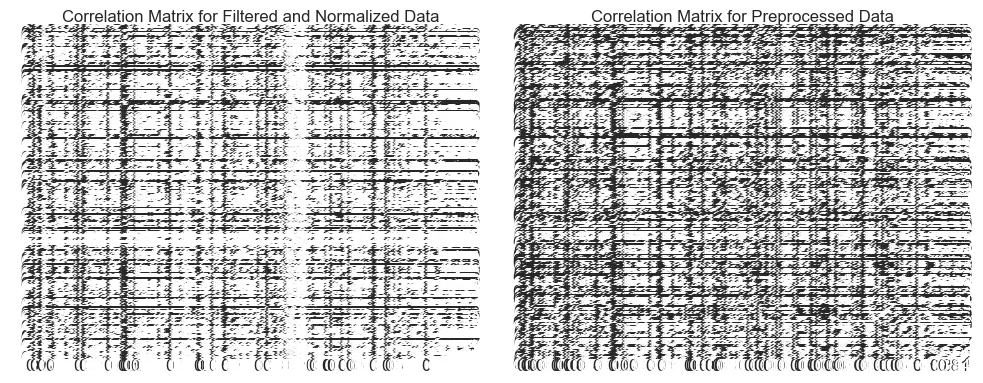

In [78]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.heatmap(transformed_corr, ax=axes[0], cmap='coolwarm', annot=True, cbar=False, xticklabels=False, yticklabels=False)
sns.heatmap(filtered_corr, ax=axes[1], cmap='coolwarm', annot=True, cbar=False, xticklabels=False, yticklabels=False)
axes[0].set_title('Correlation Matrix for Filtered and Normalized Data')
axes[1].set_title('Correlation Matrix for Preprocessed Data')
plt.tight_layout()
plt.show()


From the visualization, we can conclude that the datasets are both weakly correlated.

---
## Compare on Random Forest Classifier

After adding the necessary imports for this section, we can move on to compare each of the datasets performance on the Random Forest Model. We perform a simple train-test split for both transformed and filtered, and repeat it for HCC and MCF. The next step is to train the models on each of the dataset.

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [41]:
# Splitting the HCC transformed dataset
X_HCC_transformed_train, X_HCC_transformed_test, y_HCC_transformed_train, y_HCC_transformed_test = train_test_split(df_HCC_s_tc.T, labels(df_HCC_s_tc), test_size=0.2, random_state=42)

# Splitting the MCF transformed dataset
X_MCF_transformed_train, X_MCF_transformed_test, y_MCF_transformed_train, y_MCF_transformed_test = train_test_split(df_MCF_s_tc.T, labels(df_MCF_s_tc), test_size=0.2, random_state=42)

# Splitting the HCC filtered dataset
X_HCC_filtered_train, X_HCC_filtered_test, y_HCC_filtered_train, y_HCC_filtered_test = train_test_split(df_HCC_s_f.T, labels(df_HCC_s_f), test_size=0.2, random_state=42)

# Splitting the MCF filtered dataset
X_MCF_filtered_train, X_MCF_filtered_test, y_MCF_filtered_train, y_MCF_filtered_test = train_test_split(df_MCF_s_f.T, labels(df_MCF_s_f), test_size=0.2, random_state=42)


In [42]:
#For HCC
# Train Random Forest models on each dataset
rf_model_transformed = RandomForestClassifier(random_state=42)
rf_model_transformed.fit(X_HCC_transformed_train, y_HCC_transformed_train)

rf_model_filtered = RandomForestClassifier(random_state=42)
rf_model_filtered.fit(X_HCC_filtered_train, y_HCC_filtered_train)

# Evaluate the models
y_transformed_pred = rf_model_transformed.predict(X_HCC_transformed_test)
y_filtered_pred = rf_model_filtered.predict(X_HCC_filtered_test)


#For MCF
# Train Random Forest models on each dataset
rf_model_transformed = RandomForestClassifier(random_state=42)
rf_model_transformed.fit(X_MCF_transformed_train, y_MCF_transformed_train)

rf_model_filtered = RandomForestClassifier(random_state=42)
rf_model_filtered.fit(X_MCF_filtered_train, y_MCF_filtered_train)

# Evaluate the models
y_transformed_pred = rf_model_transformed.predict(X_MCF_transformed_test)
y_filtered_pred = rf_model_filtered.predict(X_MCF_filtered_test)



In [50]:
#For HCC
# Train Random Forest models on each dataset
rf_model_HCC_transformed = RandomForestClassifier(random_state=42)
rf_model_HCC_transformed.fit(X_HCC_transformed_train, y_HCC_transformed_train)

rf_model_HCC_filtered = RandomForestClassifier(random_state=42)
rf_model_HCC_filtered.fit(X_HCC_filtered_train, y_HCC_filtered_train)

# Evaluate the models
y_HCC_transformed_pred = rf_model_HCC_transformed.predict(X_HCC_transformed_test)
y_HCC_filtered_pred = rf_model_HCC_filtered.predict(X_HCC_filtered_test)

#For MCF
# Train Random Forest models on each dataset
rf_model_MCF_transformed = RandomForestClassifier(random_state=42)
rf_model_MCF_transformed.fit(X_MCF_transformed_train, y_MCF_transformed_train)

rf_model_MCF_filtered = RandomForestClassifier(random_state=42)
rf_model_MCF_filtered.fit(X_MCF_filtered_train, y_MCF_filtered_train)

# Evaluate the models
y_MCF_transformed_pred = rf_model_MCF_transformed.predict(X_MCF_transformed_test)
y_MCF_filtered_pred = rf_model_MCF_filtered.predict(X_MCF_filtered_test)


As evaluation parameters, we use accuracy, precision, recall and f-1 score, before moving on to a general evaluation.

In [56]:
#For HCC
# Evaluate the models
y_HCC_transformed_pred = rf_model_HCC_transformed.predict(X_HCC_transformed_test)
y_HCC_filtered_pred = rf_model_HCC_filtered.predict(X_HCC_filtered_test)

accuracy_HCC_transformed = metrics.accuracy_score(y_HCC_transformed_test, y_HCC_transformed_pred)
accuracy_HCC_filtered = metrics.accuracy_score(y_HCC_filtered_test, y_HCC_filtered_pred)

precision_HCC_transformed = metrics.precision_score(y_HCC_transformed_test, y_HCC_transformed_pred)
precision_HCC_filtered = metrics.precision_score(y_HCC_filtered_test, y_HCC_filtered_pred)

recall_HCC_transformed = metrics.recall_score(y_HCC_transformed_test, y_HCC_transformed_pred)
recall_HCC_filtered = metrics.recall_score(y_HCC_filtered_test, y_HCC_filtered_pred)

f1_score_HCC_transformed = metrics.f1_score(y_HCC_transformed_test, y_HCC_transformed_pred)
f1_score_HCC_filtered = metrics.f1_score(y_HCC_filtered_test, y_HCC_filtered_pred)



#For MCF
# Evaluate the models
y_MCF_transformed_pred = rf_model_MCF_transformed.predict(X_MCF_transformed_test)
y_MCF_filtered_pred = rf_model_MCF_filtered.predict(X_MCF_filtered_test)

accuracy_MCF_transformed = metrics.accuracy_score(y_MCF_transformed_test, y_MCF_transformed_pred)
accuracy_MCF_filtered = metrics.accuracy_score(y_MCF_filtered_test, y_MCF_filtered_pred)

precision_MCF_transformed = metrics.precision_score(y_MCF_transformed_test, y_MCF_transformed_pred)
precision_MCF_filtered = metrics.precision_score(y_MCF_filtered_test, y_MCF_filtered_pred)

recall_MCF_transformed = metrics.recall_score(y_MCF_transformed_test, y_MCF_transformed_pred)
recall_MCF_filtered = metrics.recall_score(y_MCF_filtered_test, y_MCF_filtered_pred)

f1_score_MCF_transformed = metrics.f1_score(y_MCF_transformed_test, y_MCF_transformed_pred)
f1_score_MCF_filtered = metrics.f1_score(y_MCF_filtered_test, y_MCF_filtered_pred)

In [60]:
#For HCC
# Print the evaluation metrics
print("HCC Transformed Data:")
print("Accuracy:", accuracy_HCC_transformed)
print("Precision:", precision_HCC_transformed)
print("Recall:", recall_HCC_transformed)
print("F1-Score:", f1_score_HCC_transformed)

print("\nHCC Filtered Data:")
print("Accuracy:", accuracy_HCC_filtered)
print("Precision:", precision_HCC_filtered)
print("Recall:", recall_HCC_filtered)
print("F1-Score:", f1_score_HCC_filtered)


HCC Transformed Data:
Accuracy: 0.8163265306122449
Precision: 0.7894736842105263
Recall: 0.75
F1-Score: 0.7692307692307692

HCC Filtered Data:
Accuracy: 0.9347826086956522
Precision: 0.9615384615384616
Recall: 0.9259259259259259
F1-Score: 0.9433962264150944


In [61]:
#For MCF
# Print the evaluation metrics
print("MCF Transformed Data:")
print("Accuracy:", accuracy_MCF_transformed)
print("Precision:", precision_MCF_transformed)
print("Recall:", recall_MCF_transformed)
print("F1-Score:", f1_score_MCF_transformed)

print("\nMCF Filtered Data:")
print("Accuracy:", accuracy_MCF_filtered)
print("Precision:", precision_MCF_filtered)
print("Recall:", recall_MCF_filtered)
print("F1-Score:", f1_score_MCF_filtered)

MCF Transformed Data:
Accuracy: 0.987012987012987
Precision: 0.9772727272727273
Recall: 1.0
F1-Score: 0.9885057471264368

MCF Filtered Data:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


In [67]:
#For HCC
# Perform cross-validation and compute the scores
scores_HCC_transformed = cross_val_score(rf_model_HCC_transformed, df_HCC_s_tc.T, labels(df_HCC_s_tc), cv=5, scoring='accuracy')
scores_HCC_filtered = cross_val_score(rf_model_HCC_filtered, df_HCC_s_tc.T, labels(df_HCC_s_tc), cv=5, scoring='accuracy')

# Compute the mean and standard deviation of the scores
mean_score_HCC_transformed = scores_HCC_transformed.mean()
mean_score_HCC_filtered = scores_HCC_filtered.mean()

# Print the results
print("Cross-Validation Accuracy Scores:", scores_HCC_transformed)
print("Mean Accuracy Score:", mean_score_HCC_transformed)

print("Cross-Validation Accuracy Scores:", scores_HCC_filtered)
print("Mean Accuracy Score:", mean_score_HCC_filtered)

Cross-Validation Accuracy Scores: [0.93877551 0.85714286 0.95918367 0.91666667 0.95833333]
Mean Accuracy Score: 0.9260204081632653
Cross-Validation Accuracy Scores: [0.93877551 0.85714286 0.95918367 0.91666667 0.95833333]
Mean Accuracy Score: 0.9260204081632653


In [68]:
#For MCF
# Perform cross-validation and compute the scores
scores_MCF_transformed = cross_val_score(rf_model_MCF_transformed, df_MCF_s_tc.T, labels(df_MCF_s_tc), cv=5, scoring='accuracy')
scores_MCF_filtered = cross_val_score(rf_model_MCF_filtered, df_MCF_s_tc.T, labels(df_MCF_s_tc), cv=5, scoring='accuracy')

# Compute the mean and standard deviation of the scores
mean_score_MCF_transformed = scores_MCF_transformed.mean()
mean_score_MCF_filtered = scores_MCF_filtered.mean()

# Print the results
print("Cross-Validation Accuracy Scores:", scores_MCF_transformed)
print("Mean Accuracy Score:", mean_score_MCF_transformed)

print("Cross-Validation Accuracy Scores:", scores_MCF_filtered)
print("Mean Accuracy Score:", mean_score_MCF_filtered)

Cross-Validation Accuracy Scores: [0.94805195 0.96103896 1.         0.96052632 0.98684211]
Mean Accuracy Score: 0.971291866028708
Cross-Validation Accuracy Scores: [0.94805195 0.96103896 1.         0.96052632 0.98684211]
Mean Accuracy Score: 0.971291866028708


Overall, the filtered data performed slightly better than the transformed one. However, both produced good results.